In [1]:
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def general_plotting(data_array, metric_names, title, save_location):
    #plt.style.use('seaborn-v0_8-whitegrid')
    for metric_name in metric_names:
        for data_i in data_array:
            x = data_i[metric_name][0, :,0]
            ys = data_i[metric_name][:, :, 1]
            mean=np.mean(ys,axis=0)
            std=np.std(ys,axis=0)
            plt.plot(x, mean, label = data_i['type'])
            plt.fill_between(x, mean-std, mean+std, alpha=0.2)
        plt.grid()
        if title is not None:
            plt.title(title)
        plt.ylabel(metric_name)
        plt.xlabel('iterations')
        plt.legend()
        if save_location:
            if not os.path.exists(save_location):
                os.makedirs(save_location)
            plt.savefig(save_location + '/' + title + '_' + metric_name + '.png')
        plt.show()

In [3]:
def read_and_plot_data(models_dir, starts_with, metric_names, title=None):
    model_paths = [filename for filename in os.listdir(models_dir) if filename.startswith(starts_with)]
    model_paths = [models_dir + model_paths_i for model_paths_i in model_paths]
    model_paths.sort()
    print(model_paths)

    symmetry_reduced_paths = []
    default_paths = []
    for model_path_i in model_paths:
        f = open(model_path_i +'/params.json')
        model_path_i_params = json.load(f)
        if(model_path_i_params["state_encoder_factory"]['type']=='symmetry'):
            symmetry_reduced_paths.append(model_path_i)
        elif(model_path_i_params["state_encoder_factory"]['type']=='default'):
            default_paths.append(model_path_i)
    print("Default_paths:", default_paths, "Symmetry reduced paths: ", symmetry_reduced_paths)

    default_data = {metric:[] for metric in metric_names}
    default_data['type'] = 'default'
    symmetry_reduced_data = {metric:[] for metric in metric_names}
    symmetry_reduced_data['type'] = 'symmetry'
    
    for metric_name in metric_names:
        for default_path in default_paths:
            default_data[metric_name].append(np.loadtxt(default_path + '/' + metric_name + ".csv", delimiter=',')[:,1:3])
        default_data[metric_name] = np.array(default_data[metric_name])
        for symmetry_reduced_path in symmetry_reduced_paths:
            symmetry_reduced_data[metric_name].append(np.loadtxt(symmetry_reduced_path + '/' + metric_name + ".csv", delimiter=',')[:,1:3])
        symmetry_reduced_data[metric_name] = np.array(symmetry_reduced_data[metric_name])
    general_plotting([default_data, symmetry_reduced_data], metric_names, title, save_location=models_dir + "figures/" + starts_with)

In [10]:
type = 'dynamics'
#type = 'offline-rl'

starts_with = 'exp_5_dynamics'
title = 'Reacher Dynamics'

if type == 'dynamics':
    metric_names =  ["loss", "variance", "observation_error", "reward_error"]
if type == 'offline-rl':
    metric_names =  ["loss", "variance", "observation_error", "reward_error"]

['d3rlpy_logs/exp_5_dynamics_reacher_default_20231022000548', 'd3rlpy_logs/exp_5_dynamics_reacher_default_20231022074412', 'd3rlpy_logs/exp_5_dynamics_reacher_default_20231022151920', 'd3rlpy_logs/exp_5_dynamics_reacher_symmetry_20231021133449', 'd3rlpy_logs/exp_5_dynamics_reacher_symmetry_20231022035204', 'd3rlpy_logs/exp_5_dynamics_reacher_symmetry_20231022112713']
Default_paths: ['d3rlpy_logs/exp_5_dynamics_reacher_default_20231022000548', 'd3rlpy_logs/exp_5_dynamics_reacher_default_20231022074412', 'd3rlpy_logs/exp_5_dynamics_reacher_default_20231022151920'] Symmetry reduced paths:  ['d3rlpy_logs/exp_5_dynamics_reacher_symmetry_20231021133449', 'd3rlpy_logs/exp_5_dynamics_reacher_symmetry_20231022035204', 'd3rlpy_logs/exp_5_dynamics_reacher_symmetry_20231022112713']


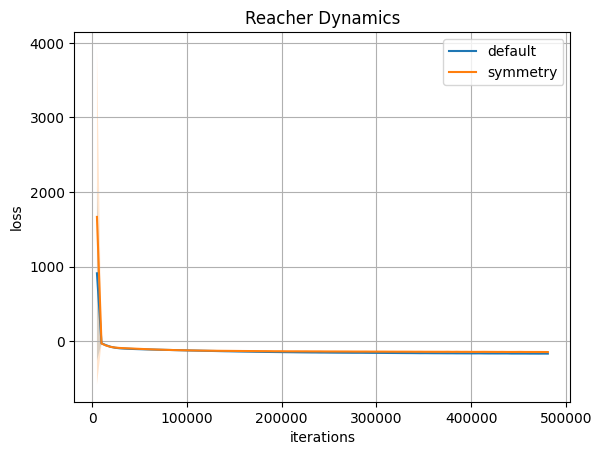

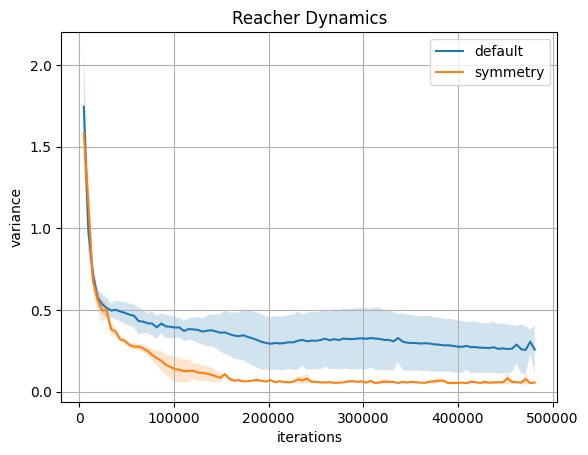

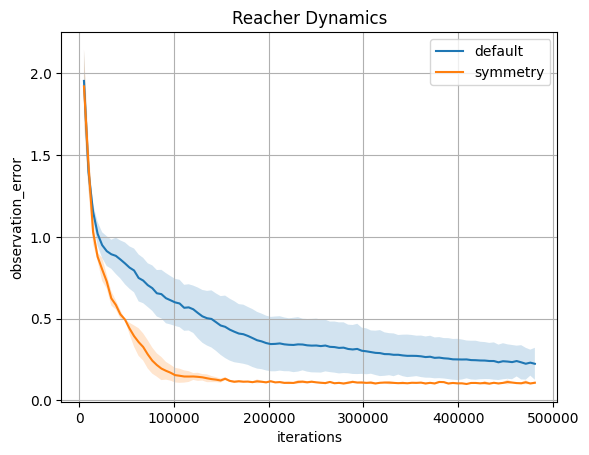

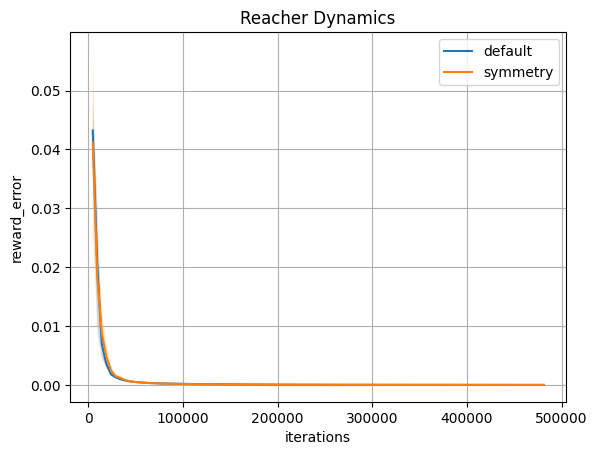

In [11]:
read_and_plot_data("d3rlpy_logs/", starts_with, metric_names, title=title)